In [138]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
from keras.layers import LeakyReLU


In [139]:
# img_width, img_height = 512, 512

# train_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\dataset\data_c_vs_nc\train'
# validation_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\dataset\data_c_vs_nc\validate'
# test_data_dir = r"C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\dataset\data_c_vs_nc\test"

In [140]:
img_width, img_height = 512, 512

train_data_dir = r"C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\finaldata\train"
validation_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\finaldata\val'
test_data_dir = r"C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\finaldata\test"

In [141]:
nb_train_samples = 204
nb_validation_samples = 40
num_of_test_samples = 16
epochs = 50
batch_size = 32

In [142]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)

In [143]:
input_shape

(512, 512, 1)

In [144]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

In [145]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(LeakyReLU(alpha=0.1))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
# model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [146]:
#model.summary()

In [147]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [148]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 0.1)

In [149]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [150]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode ='grayscale')

Found 1944 images belonging to 2 classes.


In [151]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale')

Found 243 images belonging to 2 classes.


In [152]:
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

Found 16 images belonging to 2 classes.


In [153]:
STEP_SIZE_TRAIN = nb_train_samples // batch_size
STEP_SIZE_VALID = nb_validation_samples // batch_size
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Epoch 1/50
6/6 [==============================] - 26s 4s/step - loss: 14.9295 - accuracy: 0.5521 - val_loss: 0.6625 - val_accuracy: 0.6562
Epoch 2/50
6/6 [==============================] - 23s 4s/step - loss: 0.7493 - accuracy: 0.5677 - val_loss: 0.6876 - val_accuracy: 0.6562
Epoch 3/50
6/6 [==============================] - 23s 4s/step - loss: 0.6329 - accuracy: 0.6354 - val_loss: 0.6628 - val_accuracy: 0.6250
Epoch 4/50
6/6 [==============================] - 23s 4s/step - loss: 0.6680 - accuracy: 0.6510 - val_loss: 0.6603 - val_accuracy: 0.6875
Epoch 5/50
6/6 [==============================] - 24s 4s/step - loss: 0.5996 - accuracy: 0.7031 - val_loss: 0.7051 - val_accuracy: 0.5625
Epoch 6/50
6/6 [==============================] - 24s 4s/step - loss: 0.6442 - accuracy: 0.6615 - val_loss: 0.6471 - val_accuracy: 0.6250
Epoch 7/50
6/6 [==============================] - 24s 4s/step - loss: 0.7358 - accuracy: 0.6042 - val_loss: 0.7031 - val_accuracy: 0.5938
Epoch 8/50
6/6 [=================

In [154]:
model.evaluate_generator(generator=validation_generator,steps=STEP_SIZE_VALID)

[0.7338792681694031, 0.59375]

In [155]:
STEP_SIZE_TEST = 1
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)

1/1 [==============================] - 0s 1ms/step


In [156]:
pred

array([[0.33584803],
       [0.4156437 ],
       [0.08480737],
       [0.24938929],
       [0.1113109 ],
       [0.10827386],
       [0.2850164 ],
       [0.20431137],
       [0.24612671],
       [0.26007104],
       [0.17246518],
       [0.3493007 ],
       [0.13673863],
       [0.20820665],
       [0.14558259],
       [0.2831871 ]], dtype=float32)

In [157]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [158]:
labels = (train_generator.class_indices)
# labels.keys()
target = test_generator.classes

In [159]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [160]:
# labels = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]


In [161]:
# predictions

In [162]:
# filenames=test_generator.filenames
# results=pd.DataFrame({"Filename":filenames,
#                       "Predictions":predictions})
# results.to_csv("results.csv",index=False)

Text(0.5, 0, 'Epoch')

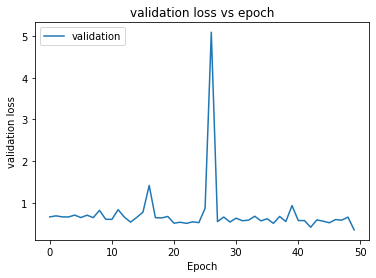

In [163]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

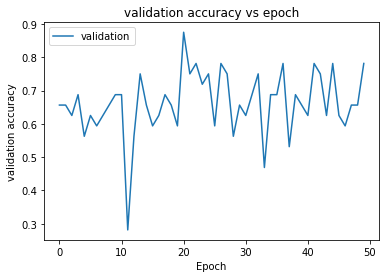

In [164]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')

In [165]:
# validation_generator[1]

In [166]:
from sklearn.metrics import confusion_matrix , classification_report
# len(validation_generator[1])
# len(predicted_class_indices)
print("Classification Report: \n", classification_report(target, predicted_class_indices))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



C:\Users\prast\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prast\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prast\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
# #Confusion Matrix and Classification Report
# Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(validation_generator.classes, y_pred))
# print('Classification Report')
# target_names = ['covid', 'normal']
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [168]:
from sklearn.metrics import roc_curve,roc_auc_score


In [169]:
fpr , tpr , thresholds = roc_curve ( target , predicted_class_indices)


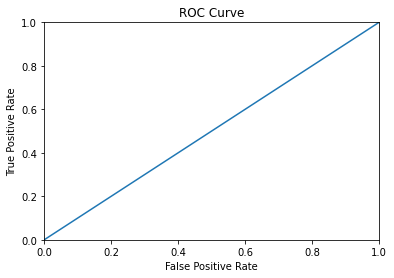

In [170]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [171]:
auc_score=roc_auc_score(target,predicted_class_indices) 
auc_score

0.5

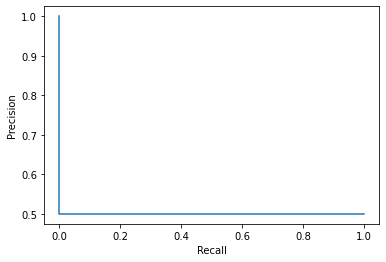

In [172]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(target, predicted_class_indices)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()